<a href="https://colab.research.google.com/github/jbmmbj/m494/blob/main/FrEIA_Quickstart_exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install FrEIA

  Preparing metadata (setup.py) ... done
  Created wheel for FrEIA: filename=FrEIA-0.2-py3-none-any.whl size=42759 sha256=3f3670a39976d20c1a39c725951b9dd1f31eb6119fc42ae746c836e6ab409ad7
  Stored in directory: /root/.cache/pip/wheels/81/a8/e2/d532a76f72108ac4a340cbe3f86b4f591abfdbd75209a5badb
Successfully built FrEIA


In [96]:

# standard imports
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 100
N_DIM = 2

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 512), nn.ReLU(),
                         nn.Linear(512,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.001)

# a very basic training loop
for i in range(1000):
    optimizer.zero_grad()
    # sample data from the moons distribution
    data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    x = torch.Tensor(data)

    pad_x = torch.zeros(100,2)
    x = torch.cat((x,pad_x), dim=1)

    label = label.reshape(100, 1)
    label = np.concatenate(label)
    one_h = pd.get_dummies(label)
    one_h = one_h.to_numpy()
    y = torch.Tensor(one_h)

    # pass to INN and get transformed variable z and log Jacobian determinant
    z, log_jac_det = inn(x)

    cat_z = torch.cat((z, y), dim=1)

    # calculate the negative log-likelihood of the model with a standard normal prior
    loss = 0.5*torch.sum(cat_z**2, 1) - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()

# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

RuntimeError: split_with_sizes expects split_sizes to sum exactly to 4 (input tensor's size at dimension 1), but got split_sizes=[1, 1]

In [ ]:
z, log_jac_det = inn(x)

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-3-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)

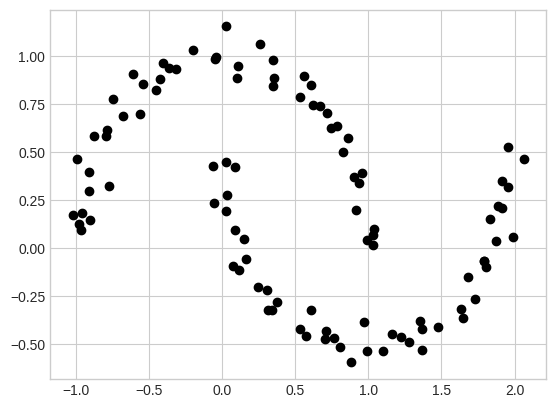

In [ ]:
plt.plot(data[:,0], data[:,1], 'o', color='black');

In [ ]:
q = samples.detach().numpy()

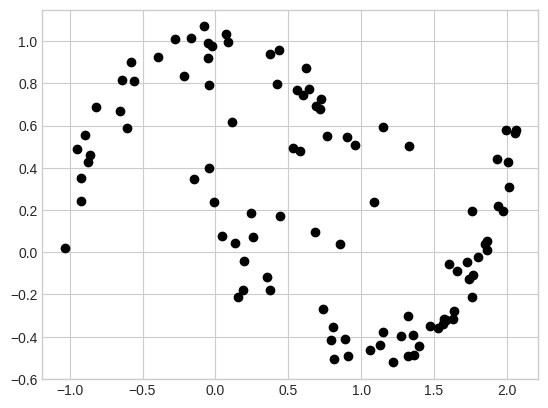

In [ ]:
plt.plot(q[:,0], q[:,1], 'o', color='black');

In [ ]:
log_jac_det.shape

torch.Size([100])

In [32]:
import pandas as pd

In [59]:
data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
label = label.reshape(100, 1)
label = np.concatenate(label)
label

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [75]:

one_h = pd.get_dummies(label)

In [61]:
one_h

,0,1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
95,1,0
96,1,0
97,0,1
98,0,1


In [76]:

one_h = one_h.to_numpy()

In [ ]:
one_h

In [ ]:

label = label.reshape(100, 1)
label = np.concatenate(label)
one_h = pd.get_dummies(label)
one_h = one_h.to_numpy()
y = torch.Tensor(one_h)

In [ ]:
cat_z = torch.cat((z, y), dim=1)
cat_z

In [ ]:
0.5*torch.sum(z**2, 1)

In [ ]:
z

In [14]:
p = samples_1.detach().numpy()

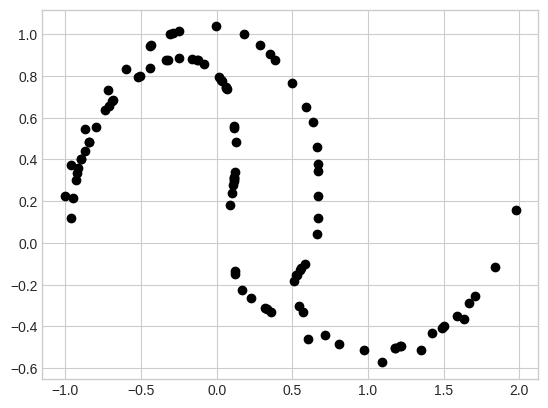

In [15]:
plt.plot(p[:,0], p[:,1], 'o', color='black');

In [88]:
samples_1, _ = inn(w, rev=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x4 and 2x2)

In [ ]:
samples_1

In [16]:
a = torch.empty(100, 2).uniform_(0, 1)

In [17]:
b = torch.bernoulli(a)

In [ ]:
b

In [82]:
z = torch.randn(BATCHSIZE, 2)

In [83]:
w = torch.cat((z,b), dim=1)

In [87]:
w.type

<function Tensor.type>

In [95]:

x = torch.Tensor(data)
pad_x = torch.zeros(100,2)
x = torch.cat((x,pad_x), dim=1)
x

tensor([[-0.9129,  0.4957,  0.0000,  0.0000],
        [ 1.0458,  0.3993,  0.0000,  0.0000],
        [ 1.1497, -0.4741,  0.0000,  0.0000],
        [ 0.9326, -0.4417,  0.0000,  0.0000],
        [-0.3255,  0.9104,  0.0000,  0.0000],
        [-0.0474,  0.4102,  0.0000,  0.0000],
        [ 0.3740,  1.0048,  0.0000,  0.0000],
        [ 0.8986, -0.4994,  0.0000,  0.0000],
        [ 0.3737,  0.9485,  0.0000,  0.0000],
        [ 1.0545, -0.0075,  0.0000,  0.0000],
        [ 0.5288, -0.4361,  0.0000,  0.0000],
        [ 0.6660,  0.8147,  0.0000,  0.0000],
        [ 0.8144,  0.7123,  0.0000,  0.0000],
        [ 0.2185, -0.0285,  0.0000,  0.0000],
        [ 2.0532,  0.3250,  0.0000,  0.0000],
        [-0.0824,  0.4929,  0.0000,  0.0000],
        [-0.9481,  0.3043,  0.0000,  0.0000],
        [ 0.4956,  0.8541,  0.0000,  0.0000],
        [ 0.9103,  0.5283,  0.0000,  0.0000],
        [ 0.9781,  0.2266,  0.0000,  0.0000],
        [-0.0742,  0.9832,  0.0000,  0.0000],
        [ 0.7932, -0.4515,  0.0000

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
test_X

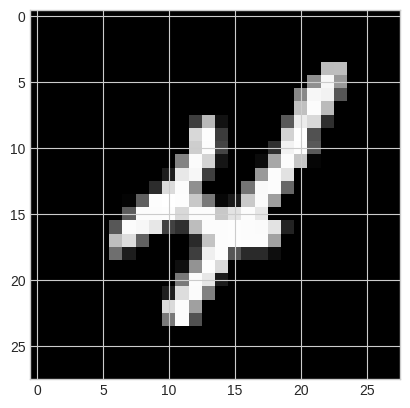

In [ ]:
plt.imshow(train_X[9], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
train_y[9]

4